# Dimitris proios, TP7 Markowitz efficient frontier 


In this tp we are finding the markowitz efficient frontier using two methods:
- analyitical 
- monte carlo simulation

To run this notebook you can run: 

`jupyter notebook on the notebooks folder`

Please you have python 3.6version or later
and make sure you have installed with conda or pip the following packages:
- numpy 
- matplotlib
- cvxopt 
- pandas 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)
solvers.options['show_progress'] = False

def getReturns():
        stocks = pd.read_csv("closes.dat", sep="\t")
        stocks.columns = ["Macdonald", "BankofAmerica", "IBM", "Chevron", "CocaCola", "Novartis", "ATT"]
        # ret = np.log((stocks)/stocks.shift(1))
        ret = (stocks-stocks.shift(1))/stocks.shift(1)
        ret.drop([0], axis=0, inplace=True)
        return ret

def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

def getMuStd(returns, w):
        p = np.asmatrix(np.mean(returns, axis=1))
        C = np.asmatrix(np.cov(returns))

        mu = w * p.T
        sigma = np.sqrt(w * C * w.T)
        return mu, sigma

def random_portfolio(returns):
        '''
        Returns the mean and standard deviation of returns for a random portfolio
        '''
        w = np.asmatrix(rand_weights(returns.shape[0]))
        return getMuStd(returns, w)



Below we are calculating the same frontier using monte carlo stimulation for 10000 portofolios.



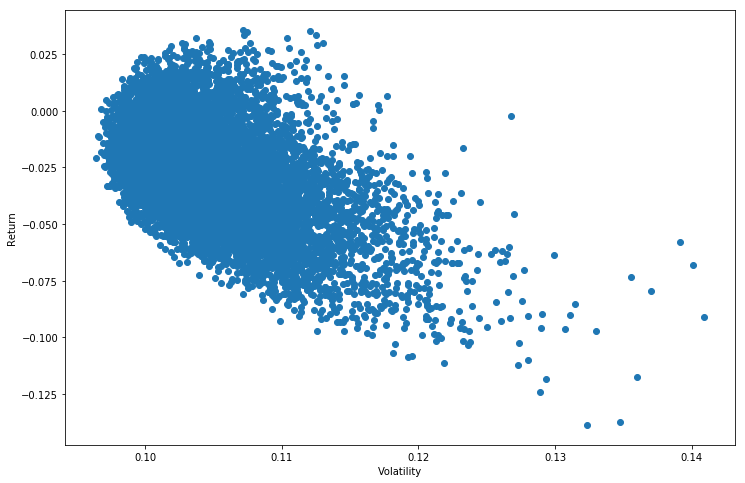

In [29]:

num_portfolios = 10000
all_weights = np.zeros((num_portfolios, 7))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)
log_ret = getReturns()

for x in range(num_portfolios):
        # Weights
        weights = np.array(np.random.random(7))
        weights = weights / np.sum(weights)
        # Save weights
        all_weights[x, :] = weights
        # Expected return
        ret_arr[x] = np.sum((log_ret.mean() * weights * 251))

        # Expected volatility
        vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 251, weights)))


plt.figure(figsize=(12, 8))
plt.plot(vol_arr, ret_arr, "o")
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()


For the analytical calculation we make use of the convx  library that uses linear programming to solve a constrain optimization problem.

In [30]:
def analytical_calculation(returns):
        n = len(returns)
        returns = np.asmatrix(returns)
        N = 100
        mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]
        cov_matrix = opt.matrix(np.cov(returns))
        pbar = opt.matrix(np.mean(returns, axis=1))

        # constraint matrices
        G = -opt.matrix(np.eye(n))
        h = opt.matrix(0.0, (n, 1))
        A = opt.matrix(1.0, (1, n))
        b = opt.matrix(1.0)

        # Calculate efficient frontier weights using quadratic programming
        portfolios = [solvers.qp(mu * cov_matrix, -pbar, G, h, A, b)['x'] for mu in mus]
        returns = [blas.dot(pbar, x) for x in portfolios]
        risks = [np.sqrt(blas.dot(x, cov_matrix * x)) for x in portfolios]
        return returns, risks



# Using the efficient frontier, find the weight of the portfolio with the minimal volatility.

Below we see the minimum point of the efficient frontier: 

/home/dimitris/anaconda3/envs/fin_TP_7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


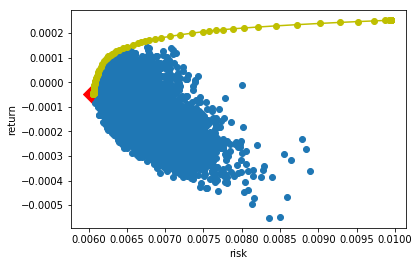

In [31]:
ret = getReturns()
ret = ret.as_matrix()
returns = ret.T
eff_returns, risks = analytical_calculation(returns)

min_risk = risks[-1]
ret_min_risk = eff_returns[-1]

plt.plot(stds, means, 'o')
plt.scatter(x=min_risk, y=ret_min_risk, c='red', marker='D', s=200)
plt.ylabel('return')
plt.xlabel('risk')
plt.plot(risks, eff_returns, 'y-o')
plt.show()


In [32]:
print("Minum volatility point: ", min_risk, ret_min_risk)

Minum volatility point:  0.006064437000898031 -4.6697127678475686e-05


# What can you say about the return of this portfolio?

The specific portfolio although being on the efficient line it has the minimum risk AND the minimum return among  optimal combinations of weights. 
This is expected since according to Harry Max Markowitz's theory no additional expected return can be gained without increasing the risk (volatility).
